In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

import os
from pandas import DataFrame
import pandas as pd
from notebook_utils import NotebookUtilities
import matplotlib.pyplot as plt
import re
import humanize
from datetime import timedelta

nu = NotebookUtilities(data_folder_path=os.path.abspath('../data'))

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    # df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(168528, 109)



# Time To Hemorrhage Control


Is hemorrhage control merely applying a tourniquet? Is it also applying a packing gauze (but not applying a dressing gauze)? Does a gaze count as engagement with the patient?

In [5]:

# Investigate the presence of hemorrhage control more broadly
# Define a function to check if a string contains the words "tourniquet" or "woundpack"
fn = lambda x: ('tourniquet' in str(x).lower()) or ('woundpack' in str(x).lower())

# Apply the lambda function to each element of the data frame, ignoring NaN values, and sum the results
srs = frvrs_logs_df.applymap(fn, na_action='ignore').sum()

# Create a list of column names with non-zero sums (indicating the presence of 'tourniquet' or 'woundpack')
columns_list = srs[srs != 0].index.tolist()

# Print the list of columns with non-zero sums
print(columns_list)

# Create a mask to filter rows where 'woundpack' is present in the 'voice_capture_message' column
mask_series = frvrs_logs_df.voice_capture_message.map(lambda x: ('woundpack' in str(x).lower()))

# Check if there are rows that meet the condition and print unique values of 'voice_capture_message'
if frvrs_logs_df[mask_series].shape[0]: print(frvrs_logs_df[mask_series].voice_capture_message.unique().tolist())

# Create a mask to filter rows where 'woundpack' is present in the 'voice_command_command_description' column
mask_series = frvrs_logs_df.voice_command_command_description.map(lambda x: ('woundpack' in str(x).lower()))

# Check if there are rows that meet the condition and print unique values of 'voice_command_command_description'
if frvrs_logs_df[mask_series].shape[0]: print(frvrs_logs_df[mask_series].voice_command_command_description.unique().tolist())

# Iterate through the columns with non-zero sums
for cn in columns_list:

    # Print the column name
    print(cn)
    
    # Create a mask to only include rows where the column contains the word "tourniquet" or "woundpack"
    mask_series = frvrs_logs_df[cn].map(fn)
    
    # Create a data frame with rows that meet the condition
    df = frvrs_logs_df[mask_series]
    
    # Display a sample of the data frame, dropping columns with all NaN values and transposing it
    display(df.sample(min(4, df.shape[0])).dropna(axis='columns', how='all').T)

['injury_record_required_procedure', 'voice_capture_message', 'voice_command_command_description', 'tool_hover_type', 'tool_selected_type', 'injury_treated_required_procedure', 'tool_applied_type', 'tool_applied_data', 'tool_applied_sender', 'tool_discarded_type']
injury_record_required_procedure


,147233,11483,127995,145719
action_type,INJURY_RECORD,INJURY_RECORD,INJURY_RECORD,INJURY_RECORD
elapsed_time,78824,343227,352403,254739
event_time,2023-04-21 08:19:00,2023-05-16 16:20:00,2023-05-31 08:50:00,2023-04-21 12:46:00
session_uuid,ee42b183-00b2-4bb9-89b9-0b38b73e69eb,724fdf45-3165-43b8-b9ca-dc07102d2886,f80ef1e8-e0d1-4106-9f18-4024ff911e22,45118b95-412c-4a2d-9373-8f7da3428ca8
file_name,clean-max8.csv,Clean 724fdf45-3165-43b8-b9ca-dc07102d2886.csv,clean-f80ef1e8-e0d1-4106-9f18-4024ff911e22.csv,clean-max6.csv
logger_version,1.0,1.0,1.0,1.0
time_group,1,2,2,2
injury_record_id,L Thigh Laceration,L Thigh Puncture,R Shin Amputation,L Thigh Laceration
injury_record_patient_id,Mike_1 Root,Mike_7 Root,Bob_0 Root,Bob_0 Root
injury_record_required_procedure,tourniquet,tourniquet,tourniquet,tourniquet


voice_capture_message


,137910,40339,141765,64515
action_type,VOICE_CAPTURE,VOICE_CAPTURE,VOICE_CAPTURE,VOICE_CAPTURE
elapsed_time,496232,299991,377823,138310
event_time,2023-04-21 12:33:00,2023-03-08 10:43:00,2023-04-21 12:00:00,2023-05-01 09:48:00
session_uuid,3bac8365-232a-4be0-a551-c5214b9f0706,89c48e7e-780f-4f1b-a846-fc0f4fd9841c,efed5e1c-4427-47df-8e3f-9e4714880169,4727e60f-7e08-4595-b565-b6e80b7a8d87
file_name,clean-max15.csv,Clean Marty24.csv,clean-max17.csv,clean-4727e60f-7e08-4595-b565-b6e80b7a8d87.csv
logger_version,1.0,1.0,1.0,1.0
time_group,2,1,2,1
voice_capture_message,alright OK feel for pulse she has a pulse tour...,where is OK here's my tourniquet,Would you wanna put a tourniquet on this,She needs a tourniquet


voice_command_command_description


,115973,106921,115974,103344
action_type,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND
elapsed_time,153727,207054,153727,3077938
event_time,2023-05-10 11:22:00,2023-05-10 11:44:00,2023-05-10 11:22:00,2023-06-12 15:21:00
session_uuid,d2c676e2-fddc-4872-9a26-b621d6585df9,b0a0d36e-4fb8-43b7-a966-d730e1130945,d2c676e2-fddc-4872-9a26-b621d6585df9,a0987257-801e-44c5-a1ad-81e0083bfa46
file_name,clean-d2c676e2-fddc-4872-9a26-b621d6585df9.csv,clean-b0a0d36e-4fb8-43b7-a966-d730e1130945.csv,clean-d2c676e2-fddc-4872-9a26-b621d6585df9.csv,clean-a0987257-801e-44c5-a1ad-81e0083bfa46.csv
logger_version,1.0,1.0,1.0,1.0
time_group,1,1,1,7
voice_command_message,are you hurt,are you hurt,anywhere else,walk to the safe area
voice_command_command_description,just alright I'm gonna put a tourniquet on thi...,so talking about tourniquets yes so if you put...,just alright I'm gonna put a tourniquet on thi...,OK and you can walk up and put that tourniquet...


tool_hover_type


,70684,142901,148416,19073
action_type,TOOL_HOVER,TOOL_HOVER,TOOL_HOVER,TOOL_HOVER
elapsed_time,220767,235822,66347,4290520
event_time,2023-05-10 10:44:00,2023-04-21 11:43:00,2023-04-21 10:24:00,2023-05-16 17:26:00
session_uuid,741e494b-63ff-4ea2-ad88-657f2276045d,6909d3b6-a43a-4d26-8c83-9bd8a5ea569f,cc6ad812-608f-4fc3-bae6-f837aaa056c0,724fdf45-3165-43b8-b9ca-dc07102d2886
file_name,clean-741e494b-63ff-4ea2-ad88-657f2276045d.csv,clean-max3.csv,clean-max9.csv,Clean 724fdf45-3165-43b8-b9ca-dc07102d2886.csv
logger_version,1.0,1.0,1.0,1.0
time_group,1,1,1,11
tool_hover_type,Tourniquet,Tourniquet,Tourniquet,Tourniquet
tool_hover_count,998,999,999,972


tool_selected_type


,109853,70220,93338,31546
action_type,TOOL_SELECTED,TOOL_SELECTED,TOOL_SELECTED,TOOL_SELECTED
elapsed_time,427494,322937,576433,630959
event_time,2023-05-11 10:25:00,2023-06-23 09:08:00,2023-05-09 09:37:00,2023-03-07 10:55:00
session_uuid,c12f8355-5a14-4ccc-bde4-d8038cae9220,705ac61e-38b7-4b89-8778-4ea58bad18a6,992d4672-7993-44ba-890c-0d8605ccefdd,3f142e7e-1e18-4341-947a-71f2e7f35aa2
file_name,clean-c12f8355-5a14-4ccc-bde4-d8038cae9220.csv,clean-705ac61e-38b7-4b89-8778-4ea58bad18a6.csv,clean-992d4672-7993-44ba-890c-0d8605ccefdd.csv,Clean Marty13.csv
logger_version,1.0,1.0,1.0,1.0
time_group,2,1,2,2
tool_selected_type,Tourniquet,Tourniquet,Tourniquet,Tourniquet
tool_selected_count,993,996,995,996


injury_treated_required_procedure


,2077,148017,39706,103069
action_type,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED
elapsed_time,1442856,758760,143193,2082809
event_time,2023-05-16 15:23:00,2023-04-21 08:30:00,2023-03-08 10:12:00,2023-06-12 15:04:00
session_uuid,06574b6f-ab02-432c-9a65-7b031218a270,ee42b183-00b2-4bb9-89b9-0b38b73e69eb,b52e71ec-050f-49e1-b495-7c36f5537544,a0987257-801e-44c5-a1ad-81e0083bfa46
file_name,Clean 06574b6f-ab02-432c-9a65-7b031218a270.csv,clean-max8.csv,Clean Marty23.csv,clean-a0987257-801e-44c5-a1ad-81e0083bfa46.csv
logger_version,1.0,1.0,1.0,1.0
time_group,5,2,1,6
injury_treated_id,R Shin Amputation,L Side Puncture,R Shin Amputation,L Side Puncture
injury_treated_patient_id,Lily_2 Root,Lily_4 Root,Lily_2 Root,Lily_4 Root
injury_treated_required_procedure,tourniquet,woundpack,tourniquet,woundpack


tool_applied_type


,121304,29057,66426,67505
action_type,TOOL_APPLIED,TOOL_APPLIED,TOOL_APPLIED,TOOL_APPLIED
elapsed_time,251583,603689,406395,481887
event_time,2023-06-07 08:41:00,2023-03-07 10:08:00,2023-06-07 10:17:00,2023-05-09 10:20:00
session_uuid,e072d31f-2592-4c7e-8709-3db1e111240c,2aeb2057-cbe2-494c-98a5-fc2bdbef1355,51f8d40c-9550-4ef1-a71c-e030c0a08f29,52e2653e-2230-4d8a-929b-e2a12dcb56c4
file_name,clean-e072d31f-2592-4c7e-8709-3db1e111240c.csv,Clean Marty10.csv,clean-51f8d40c-9550-4ef1-a71c-e030c0a08f29.csv,clean-52e2653e-2230-4d8a-929b-e2a12dcb56c4.csv
logger_version,1.0,1.0,1.0,1.0
time_group,1,2,2,2
tool_applied_type,Tourniquet,Tourniquet,Tourniquet,Tourniquet
tool_applied_attachment_point,LeftUpLeg (UnityEngine.GameObject),RightLeg (UnityEngine.GameObject),LeftUpLeg (UnityEngine.GameObject),RightUpLeg (UnityEngine.GameObject)
tool_applied_tool_location,tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject)


tool_applied_data


,21082,17086,77017,160607
action_type,TOOL_APPLIED,TOOL_APPLIED,TOOL_APPLIED,TOOL_APPLIED
elapsed_time,6076723,3921791,156924,359289
event_time,2023-05-16 17:56:00,2023-05-16 17:20:00,2023-06-07 09:39:00,2023-09-11 10:16:22
session_uuid,724fdf45-3165-43b8-b9ca-dc07102d2886,724fdf45-3165-43b8-b9ca-dc07102d2886,7f639dc1-fce0-4aa9-b76a-c355894d05ed,b11f14c2-8de9-4247-9753-1434cb392804
file_name,Clean 724fdf45-3165-43b8-b9ca-dc07102d2886.csv,Clean 724fdf45-3165-43b8-b9ca-dc07102d2886.csv,clean-7f639dc1-fce0-4aa9-b76a-c355894d05ed.csv,b11f14c2-8de9-4247-9753-1434cb392804.csv
logger_version,1.0,1.0,1.0,1.3
time_group,14,10,1,2
tool_applied_type,Tourniquet,Tourniquet,Tourniquet,Tourniquet
tool_applied_attachment_point,LeftUpLeg (UnityEngine.GameObject),LeftUpLeg (UnityEngine.GameObject),LeftUpLeg (UnityEngine.GameObject),RightLeg (UnityEngine.GameObject)
tool_applied_tool_location,tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject)


tool_applied_sender


,107280,151982,101544,84299
action_type,TOOL_APPLIED,TOOL_APPLIED,TOOL_APPLIED,TOOL_APPLIED
elapsed_time,496364,238653,830212,345604
event_time,2023-05-10 11:48:00,2023-09-11 12:49:43,2023-06-12 14:43:00,2023-06-07 09:02:00
session_uuid,b0a0d36e-4fb8-43b7-a966-d730e1130945,2a5106e4-984c-42a7-9edd-2fb3e6325d10,a0987257-801e-44c5-a1ad-81e0083bfa46,8ceb28a3-e268-4930-a1c6-84cac4f6239c
file_name,clean-b0a0d36e-4fb8-43b7-a966-d730e1130945.csv,2a5106e4-984c-42a7-9edd-2fb3e6325d10.csv,clean-a0987257-801e-44c5-a1ad-81e0083bfa46.csv,clean-8ceb28a3-e268-4930-a1c6-84cac4f6239c.csv
logger_version,1.0,1.3,1.0,1.0
time_group,2,2,3,2
tool_applied_type,Tourniquet,Tourniquet,Tourniquet,Tourniquet
tool_applied_attachment_point,RightUpLeg (UnityEngine.GameObject),RightUpLeg (UnityEngine.GameObject),LeftUpLeg (UnityEngine.GameObject),RightUpLeg (UnityEngine.GameObject)
tool_applied_tool_location,tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject)


tool_discarded_type


,59214,163568,139079,69132
action_type,TOOL_DISCARDED,TOOL_DISCARDED,TOOL_DISCARDED,TOOL_DISCARDED
elapsed_time,100875,64778,273958,576768
event_time,2023-05-10 10:10:00,2023-09-11 13:46:10,2023-04-21 10:11:00,2023-05-11 09:01:00
session_uuid,2df4352b-22b9-4a9f-9c2c-6031978251e1,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,cf953248-e6cf-4544-95ce-4843d0f56f10,6774cf2a-7728-4387-8788-934246a1e906
file_name,clean-2df4352b-22b9-4a9f-9c2c-6031978251e1.csv,d9d58da9-9bdc-41ea-90fe-4c84db4635d9.csv,clean-max16.csv,clean-6774cf2a-7728-4387-8788-934246a1e906.csv
logger_version,1.0,1.3,1.0,1.0
time_group,1,1,1,2
tool_discarded_type,Tourniquet,Tourniquet,Tourniquet,Tourniquet
tool_discarded_count,998,997,997,997
tool_discarded_location,"(2.9, 0.3, 0.4)","(0.8, 0.3, 4.1)","(3.9, 0.8, -3.6)","(2.9, 0.3, 4.3)"


In [6]:

# Create a list of column names that end with '_required_procedure'
required_columns_list = [cn for cn in frvrs_logs_df.columns if cn.endswith('_required_procedure')]

# Create a mask series that is True for rows where the value of any of the required columns is 'tourniquet' or 'woundpack'
mask_series = False
for cn in required_columns_list: mask_series |= (frvrs_logs_df[cn].isin(['tourniquet', 'woundpack']))

# Apply the mask to the frvrs_logs_df to filter rows based on the condition
df = frvrs_logs_df[mask_series]

# Display a sample of the data frame, dropping columns with all NaN values and transposing it
display(df.sample(min(4, df.shape[0])).dropna(axis='columns', how='all').T)

,7228,10994,39031,46267
action_type,INJURY_RECORD,INJURY_RECORD,INJURY_RECORD,INJURY_RECORD
elapsed_time,821240,134811,350889,326489
event_time,2023-05-12 17:03:00,2023-05-22 20:24:00,2023-03-07 14:14:00,2023-03-03 11:58:00
session_uuid,0b891add-e0c3-463d-948d-7f491f1d10ef,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,b878d528-37a0-4175-a294-16c4de1fd5eb,30a49dd8-c08a-4994-a622-57647670b5bb
file_name,Clean 0b891add-e0c3-463d-948d-7f491f1d10ef.csv,Clean 5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0.csv,Clean Marty22.csv,Clean Marty6.csv
logger_version,1.0,1.0,1.0,1.0
time_group,5,2,2,2
injury_record_id,L Wrist Amputation,L Side Puncture,L Thigh Laceration,L Thigh Puncture
injury_record_patient_id,Helga_17 Root,Lily_4 Root,Bob_0 Root,Mike_7 Root
injury_record_required_procedure,tourniquet,woundpack,tourniquet,tourniquet


In [7]:

# Estimating the time to hemorrhage control

# Create a mask to filter rows where 'injury_treated_required_procedure' is 'tourniquet' or 'woundpack'
mask_series = frvrs_logs_df.injury_treated_required_procedure.isin(['tourniquet', 'woundpack'])

# Define columns for grouping
groupby_columns = ['session_uuid', 'time_group', 'patient_id']

# Group the DataFrame based on the defined columns and filter by the mask
gb = frvrs_logs_df[mask_series].sort_values(['elapsed_time']).groupby(groupby_columns)

# Define lists of action types and command messages
action_types_list = [
    'TELEPORT', 'S_A_L_T_WALK_IF_CAN', 'S_A_L_T_WAVE_IF_CAN', 'PATIENT_ENGAGED', 'PULSE_TAKEN', 'BAG_ACCESS', 'TOOL_HOVER',
    'TOOL_SELECTED', 'INJURY_TREATED', 'TOOL_APPLIED', 'TAG_SELECTED', 'TAG_APPLIED', 'BAG_CLOSED', 'TAG_DISCARDED',
    'TOOL_DISCARDED'
]
command_messages_list = [
    'walk to the safe area', 'wave if you can', 'are you hurt', 'reveal injury', 'lay down', 'where are you', 'can you hear',
    'anywhere else', 'what is your name', 'hold still', 'sit up/down', 'stand up'
]

# Create an empty list to store the row dictionaries
rows_list = []

# Iterate over the groupby object
for (session_uuid, time_group, patient_id), df1 in gb:

    # Create a dictionary to store the row data
    row_dict = {}

    # Get the logger version
    logger_version = df1.logger_version.unique().item()
    row_dict['logger_version'] = logger_version

    # Add the groupby columns to the row dictionary
    for cn in groupby_columns: row_dict[cn] = eval(cn)
    

    # Get the first time to hemorrhage control
    first_control = df1.elapsed_time.min()
    row_dict['first_control'] = first_control

    # Get the patient's entire history and first notice
    mask_series = True
    for cn in groupby_columns: mask_series &= (frvrs_logs_df[cn] == eval(cn))
    df2 = frvrs_logs_df[mask_series]
    first_notice = df2.elapsed_time.min()
    row_dict['first_notice'] = first_notice

    # Calculate the time from notice to control
    row_dict['notice_to_control_time'] = first_control - first_notice

    # Get the first action with the patient
    mask_series = (df2.action_type.isin(action_types_list))
    mask_series |= ((df2.action_type == 'VOICE_COMMAND') & (df2.voice_command_message.isin(command_messages_list)))
    first_action = df2[mask_series].elapsed_time.min()
    row_dict['first_action'] = first_action

    # Calculate the time from action to control
    row_dict['action_to_control_time'] = first_control - first_action

    # Add the row dictionary to the list
    rows_list.append(row_dict)

# Create a data frame from the list of row dictionaries
notice_to_control_time_df = DataFrame(rows_list)

In [8]:

# Show a sort of notice to control time
notice_to_control_time_df.sort_values('notice_to_control_time').head(5).T

,255,444,491,188,101
logger_version,1.0,1.0,1.3,1.0,1.3
session_uuid,6d21f440-1c45-4c53-ad64-4edb92a94e25,a0987257-801e-44c5-a1ad-81e0083bfa46,b0f6e371-e548-4e1d-adc1-92891a6ca6ca,4a219569-77fc-41c2-8244-42888b25fec3,2faaa766-35d7-4fff-910c-f7b044bb913b
time_group,1,2,1,1,2
patient_id,Mike_2 Root,Mike_2 Root,Military Mike Jungle Combat_2_0 Root,Mike_5 Root,Marine with Leg Amputation Root
first_control,28351,475326,38762,62743,147682
first_notice,17132,462662,22540,44387,127394
notice_to_control_time,11219,12664,16222,18356,20288
first_action,25042,475326,28923,61609,145056
action_to_control_time,3309,0,9839,1134,2626


In [9]:

# Show a sort of notice to control time
notice_to_control_time_df.sort_values('notice_to_control_time').tail(5).T

,5,609,379,606,401
logger_version,1.0,1.3,1.0,1.0,1.0
session_uuid,04882754-51a0-4e5b-9617-b200e3609116,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,89c48e7e-780f-4f1b-a846-fc0f4fd9841c,d81f6dfd-3151-415f-a354-541240e7fbae,8f6097ce-795d-483a-a811-e6a5423bc59d
time_group,2,1,1,2,2
patient_id,Mike_7 Root,Bob_1 Root,Mike_2 Root,Mike_5 Root,Mike_5 Root
first_control,656277,487032,481480,689275,909663
first_notice,206807,29802,8454,195826,376775
notice_to_control_time,449470,457230,473026,493449,532888
first_action,214116,86710,28519,204113,396887
action_to_control_time,442161,400322,452961,485162,512776


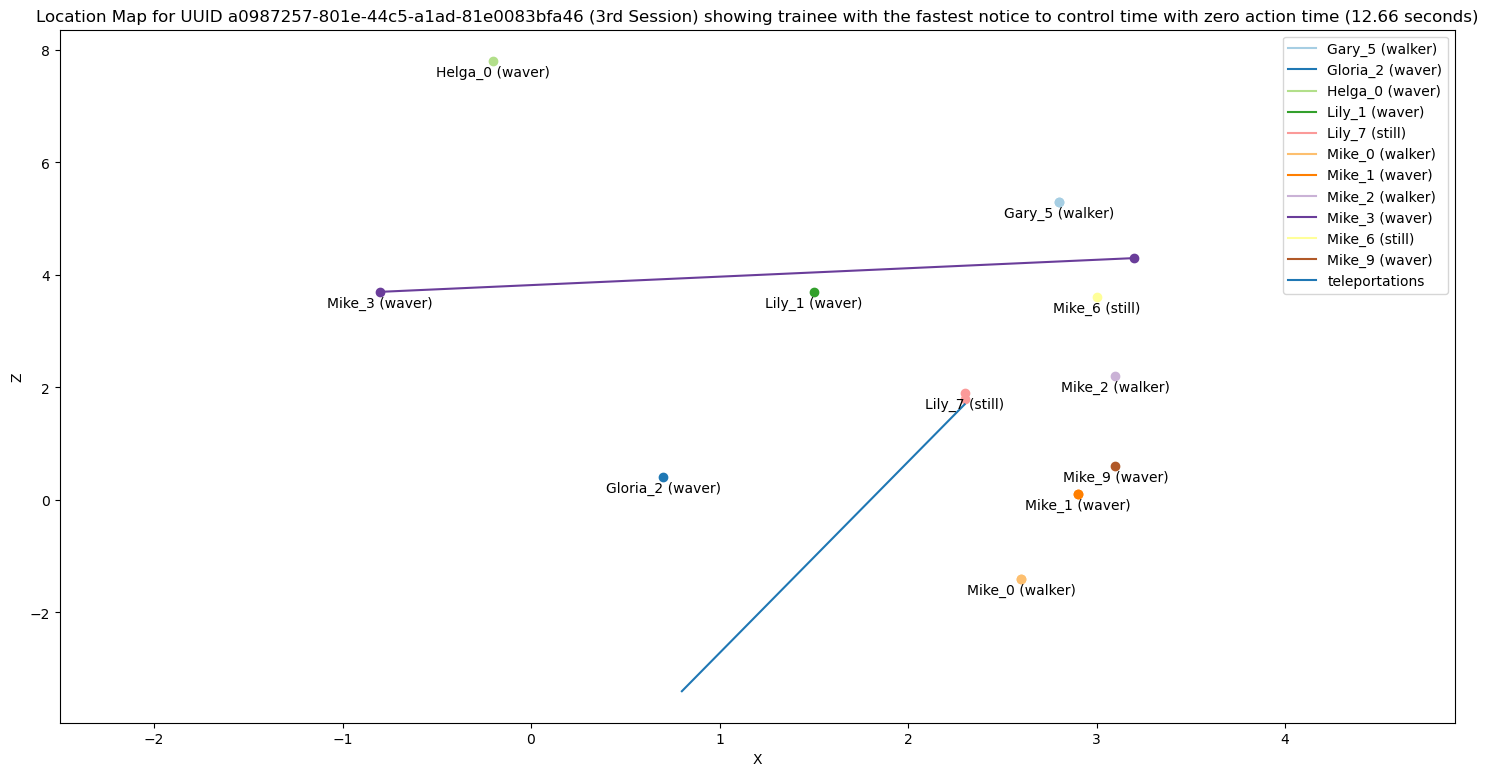

In [9]:

# Get time group with the fastest action to control time
mask_series = (notice_to_control_time_df.action_to_control_time == 0)
nu.visualize_extreme_player_movement(
    notice_to_control_time_df, 'notice_to_control_time', mask_series=mask_series, is_ascending=True,
    title_str='fastest notice to control time with zero action time', frvrs_logs_df=frvrs_logs_df, verbose=False
)

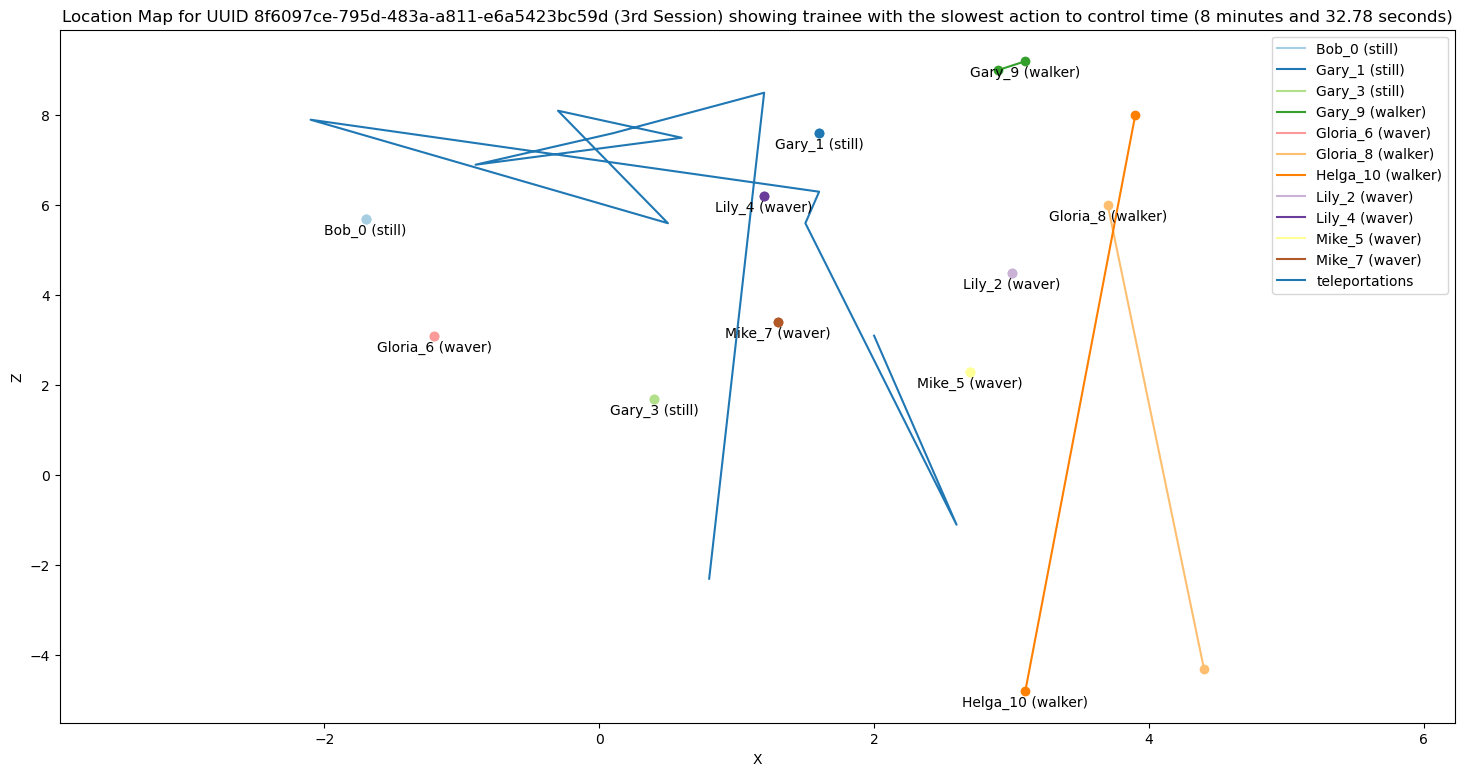

In [10]:

# Get time group with the slowest action to control time
nu.visualize_extreme_player_movement(
    notice_to_control_time_df, 'action_to_control_time', mask_series=None, is_ascending=False,
    title_str='slowest action to control time', frvrs_logs_df=frvrs_logs_df, verbose=False
)

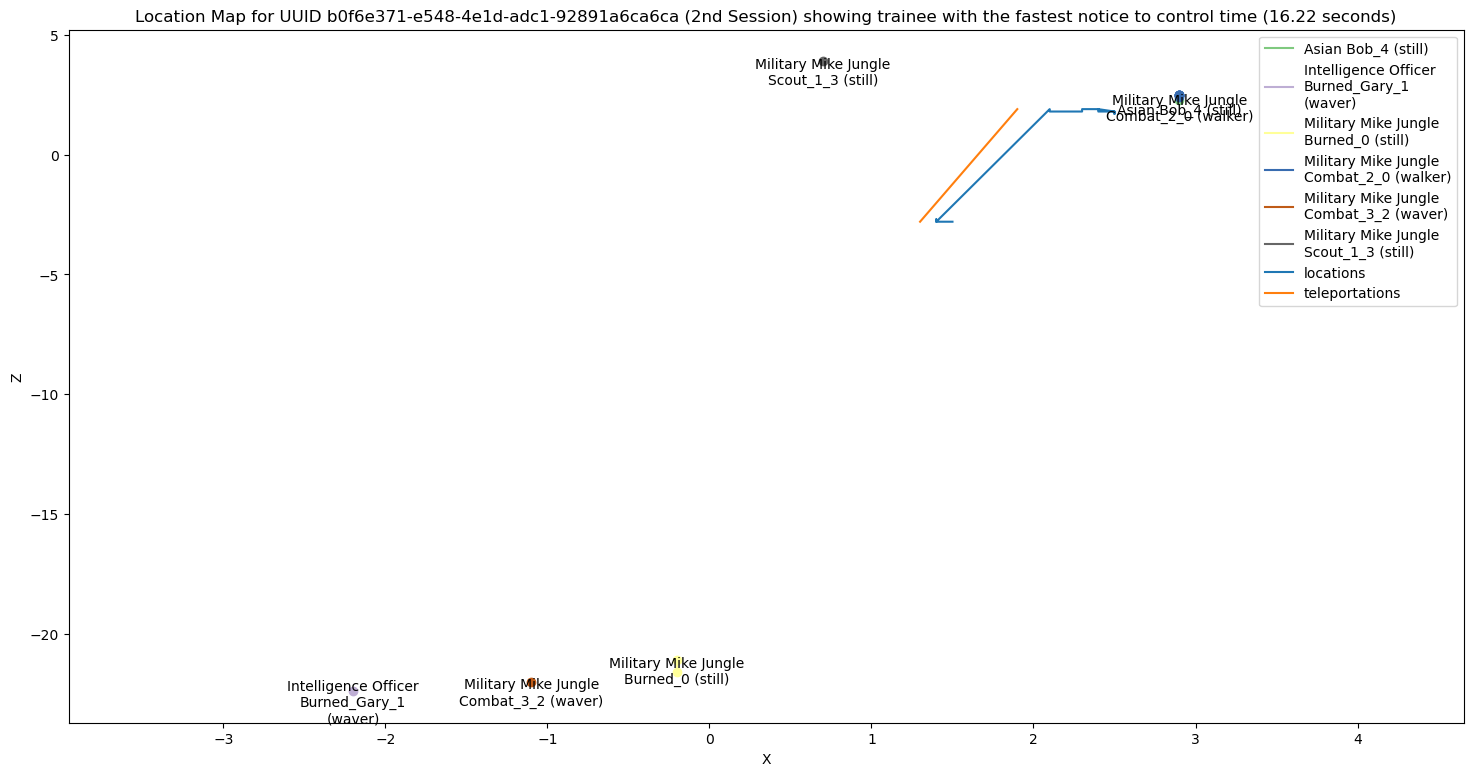

In [11]:

# Get time group with the fastest notice to control time, v1.3
mask_series = (notice_to_control_time_df.logger_version == 1.3)
nu.visualize_extreme_player_movement(
    notice_to_control_time_df, 'notice_to_control_time', mask_series=mask_series, is_ascending=True,
    title_str='fastest notice to control time', frvrs_logs_df=frvrs_logs_df, verbose=False
)

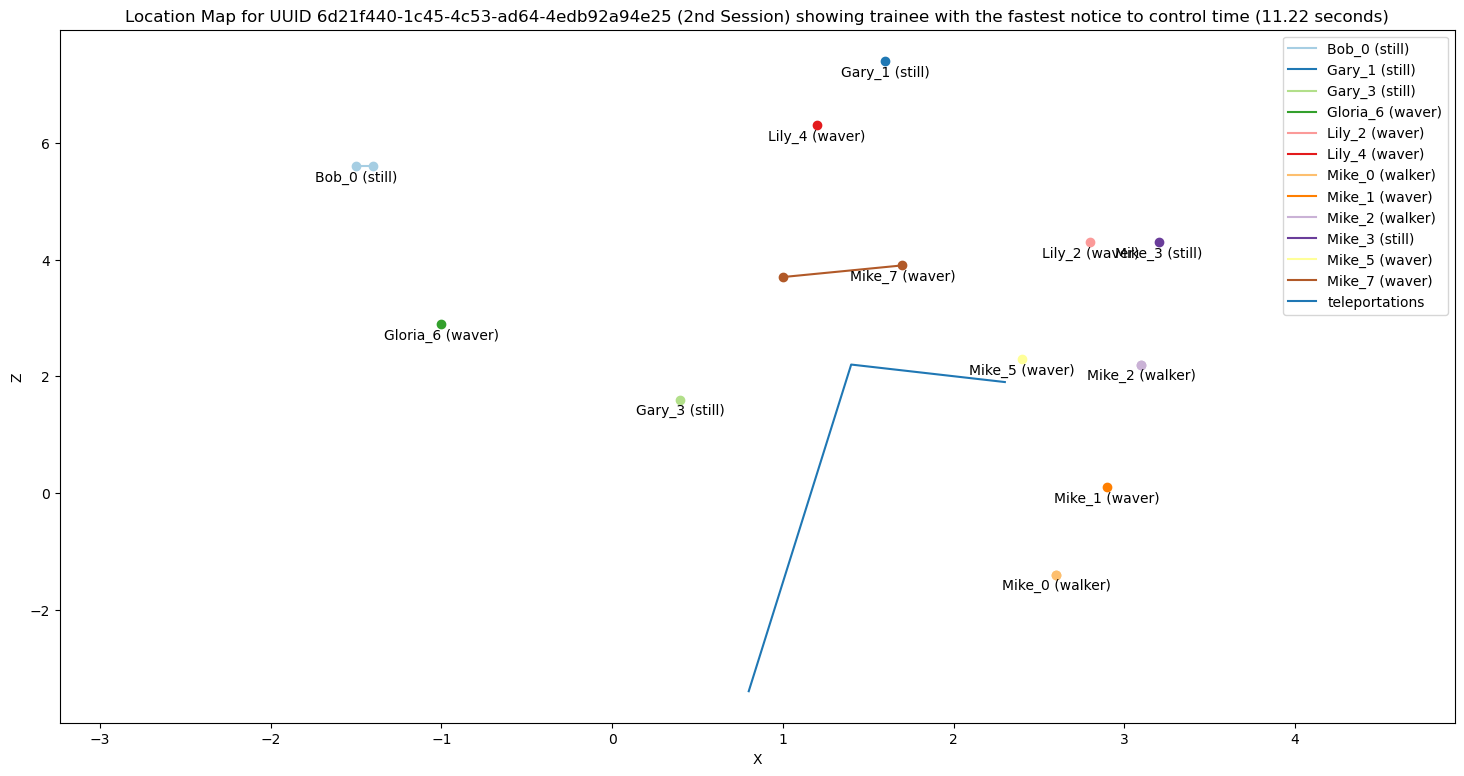

In [12]:

# Get time group with the fastest notice to control time, v1.0
mask_series = (notice_to_control_time_df.logger_version == 1.0)
nu.visualize_extreme_player_movement(
    notice_to_control_time_df, 'notice_to_control_time', mask_series=mask_series, is_ascending=True,
    title_str='fastest notice to control time', frvrs_logs_df=frvrs_logs_df, verbose=False
)

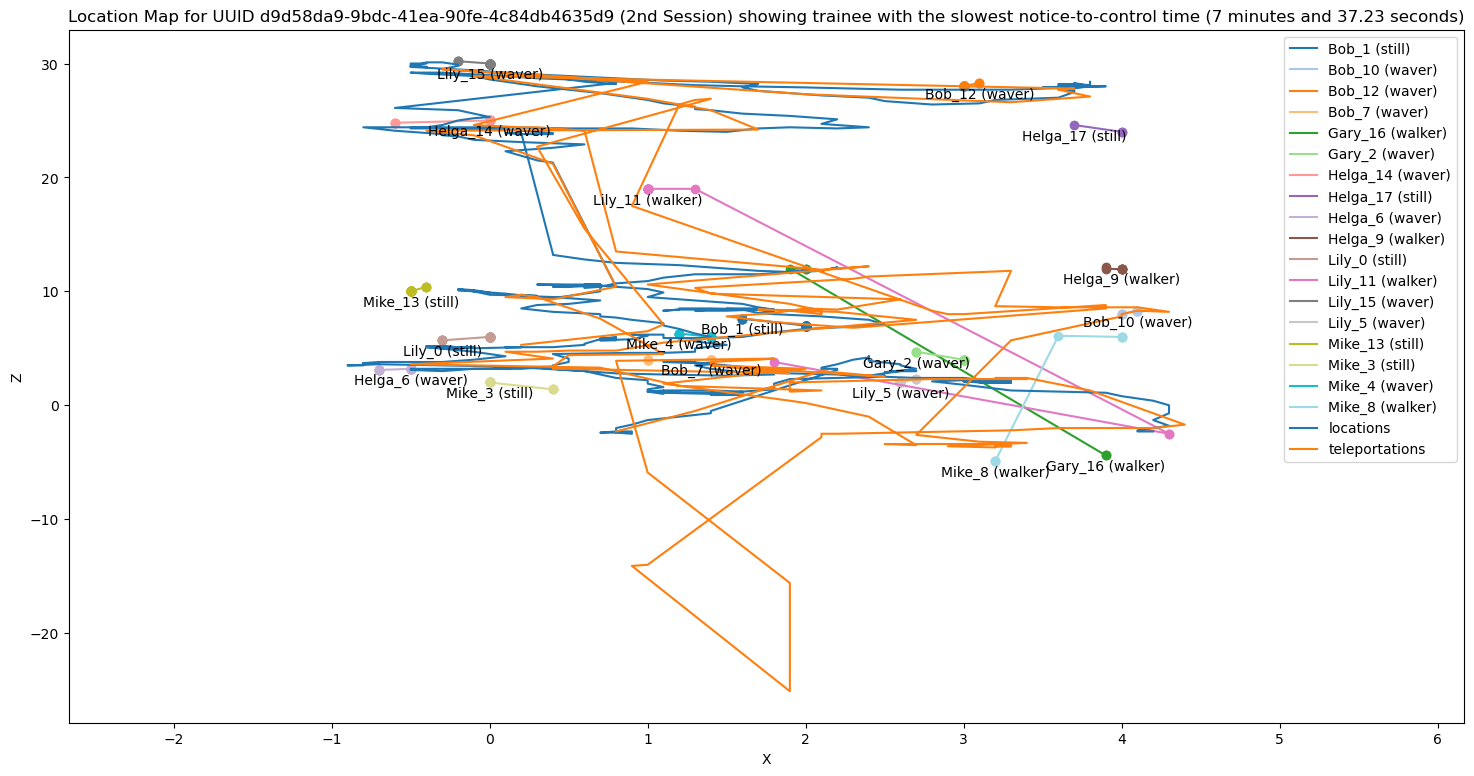

In [13]:

# Get time group with the slowest notice to control time, v1.3
mask_series = (notice_to_control_time_df.logger_version == 1.3)
nu.visualize_extreme_player_movement(
    notice_to_control_time_df, 'notice_to_control_time', mask_series=mask_series, is_ascending=False,
    title_str='slowest notice-to-control time', frvrs_logs_df=frvrs_logs_df, verbose=False
)

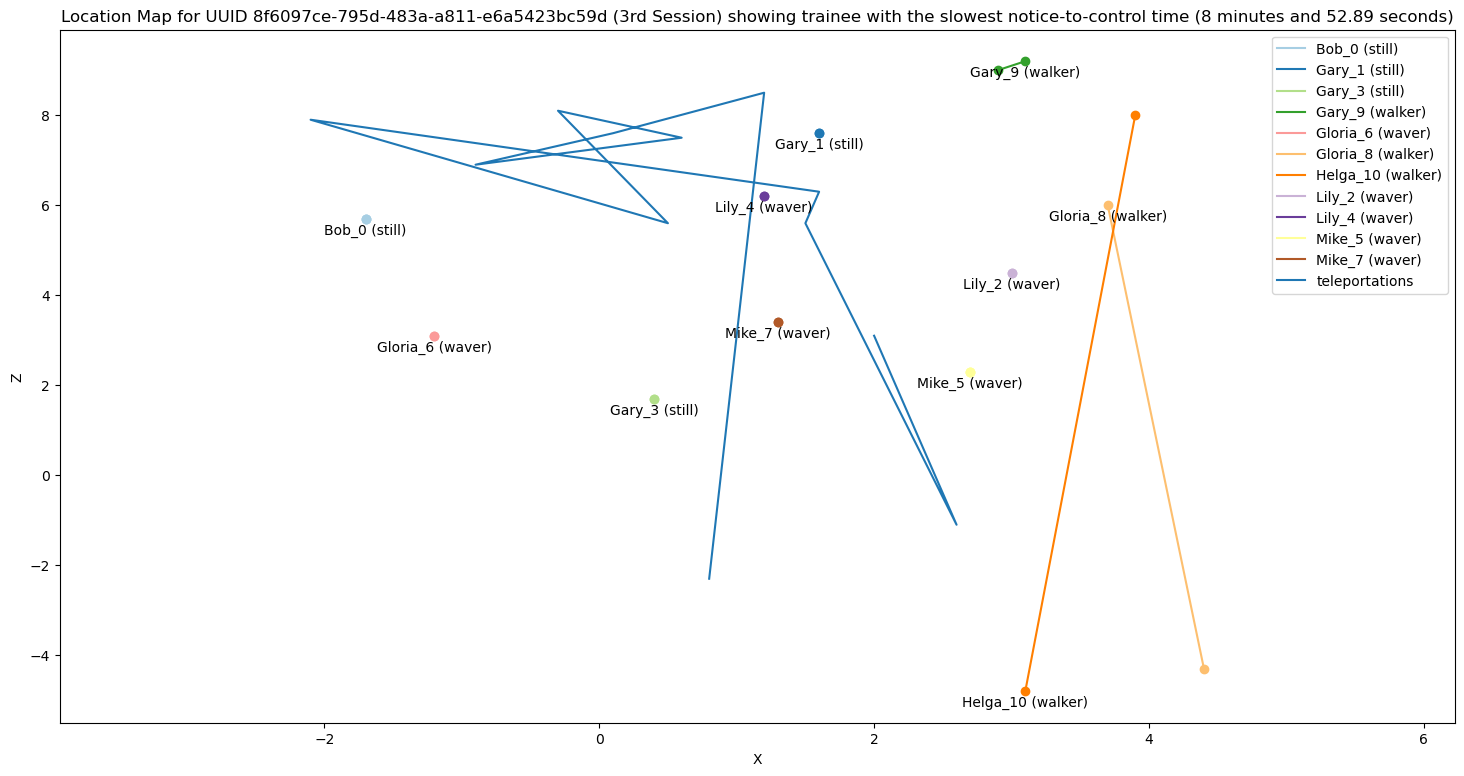

In [14]:

# Get time group with the slowest notice to control time, v1.0
mask_series = (notice_to_control_time_df.logger_version == 1.0)
nu.visualize_extreme_player_movement(
    notice_to_control_time_df, 'notice_to_control_time', mask_series=mask_series, is_ascending=False,
    title_str='slowest notice-to-control time', frvrs_logs_df=frvrs_logs_df, verbose=False
)